In [46]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV, SGDClassifier)

from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [47]:
data = pd.read_csv("Telecom_dataset.csv")
data = data.drop(columns=["state", "phone number"])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [50]:
inter_plan_mapped = data["international plan"].map({"yes": 1, "no": 0})
voice_mail_plan_mapped = data["voice mail plan"].map({"yes": 1, "no": 0})
inter_plan_mapped, voice_mail_plan_mapped

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 3328    0
 3329    0
 3330    0
 3331    1
 3332    0
 Name: international plan, Length: 3333, dtype: int64, 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 3328    1
 3329    0
 3330    0
 3331    0
 3332    1
 Name: voice mail plan, Length: 3333, dtype: int64)

In [51]:
data = data.drop(columns=["voice mail plan", "international plan"])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

In [53]:
data["voice mail plan"] = voice_mail_plan_mapped
data["international plan"] = inter_plan_mapped

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

In [55]:
y = data["churn"].astype("int").values
X = data.drop("churn", axis=1).values

In [56]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss="log", n_jobs=-1, random_state=17)
logit_pipe = Pipeline(
    [
     ("scaler", StandardScaler()),
     ("poly", PolynomialFeatures(degree=2)),
     ("sgd_logit", sgd_logit)
    ]
)

val_train, val_test = validation_curve(
    logit_pipe, X, y, "sgd_logit__alpha", alphas, cv=5, scoring="roc_auc"
)
val_train, val_test

(array([[0.91607013, 0.92960299, 0.91957663, 0.91835419, 0.91643094],
        [0.91550768, 0.92898146, 0.91884488, 0.91757786, 0.91546761],
        [0.91352377, 0.92859399, 0.91834265, 0.91667913, 0.91439208],
        [0.91325675, 0.92805881, 0.91671553, 0.916083  , 0.91413029],
        [0.9129545 , 0.92736797, 0.91598718, 0.91543021, 0.9128281 ],
        [0.91238751, 0.92630443, 0.91477366, 0.91388322, 0.91243597],
        [0.9116603 , 0.92546473, 0.9137942 , 0.91318623, 0.9122399 ],
        [0.91024339, 0.92435574, 0.91214549, 0.91220137, 0.91178544],
        [0.90911622, 0.92274566, 0.9106638 , 0.91094451, 0.91080398],
        [0.90753681, 0.92101854, 0.90908667, 0.90943039, 0.90948366],
        [0.90574152, 0.91887442, 0.90706527, 0.90743461, 0.90770547],
        [0.90360535, 0.91642578, 0.9048382 , 0.90526089, 0.90540936],
        [0.90121466, 0.91319312, 0.9020839 , 0.90255905, 0.90268371],
        [0.89865467, 0.90964117, 0.89873989, 0.89923727, 0.89915567],
        [0.89524361,

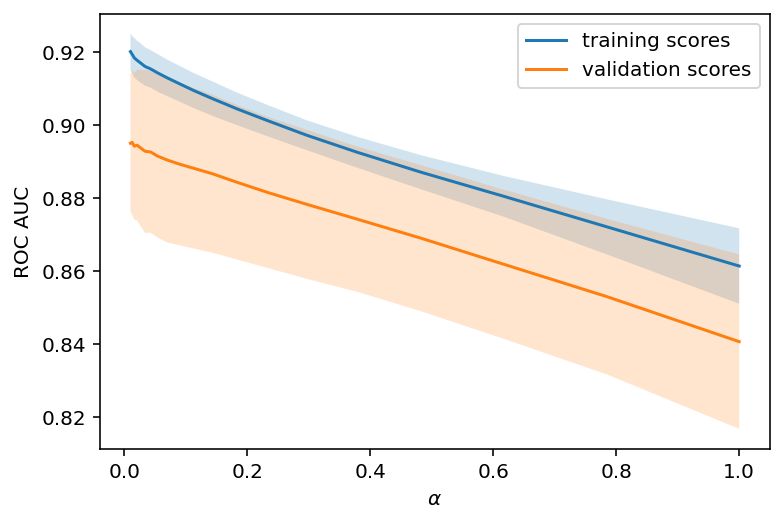

In [57]:
def plot_with_err(x, data, **kwargs):
  mu, std = data.mean(1), data.std(1)
  lines = plt.plot(x, mu, "-", **kwargs)
  plt.fill_between(
      x,
      mu - std,
      mu + std,
      edgecolor = "none",
      facecolor = lines[0].get_color(),
      alpha = 0.2
  )

plot_with_err(alphas, val_train, label="training scores")
plot_with_err(alphas, val_test, label="validation scores")
plt.xlabel(r"$\alpha$")
plt.ylabel("ROC AUC")
plt.legend()

In [62]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(degree=2, alpha=0.01):
  train_sizes = np.linspace(0.05, 1, 20)
  logit_pipe = Pipeline(
      [
       ("scaler", StandardScaler()),
       ("poly", PolynomialFeatures(degree=degree)),
       ("sgd_logit", SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha))
      ]
  )
  N_train, val_train, val_test = learning_curve(
      logit_pipe, X, y, train_sizes=train_sizes, cv=5, scoring="roc_auc"
  )
  plot_with_err(N_train, val_train, label="training scores")
  plot_with_err(N_train, val_test, label="validation scores")
  plt.xlabel("Training set size")
  plt.ylabel("AUC")
  plt.legend()

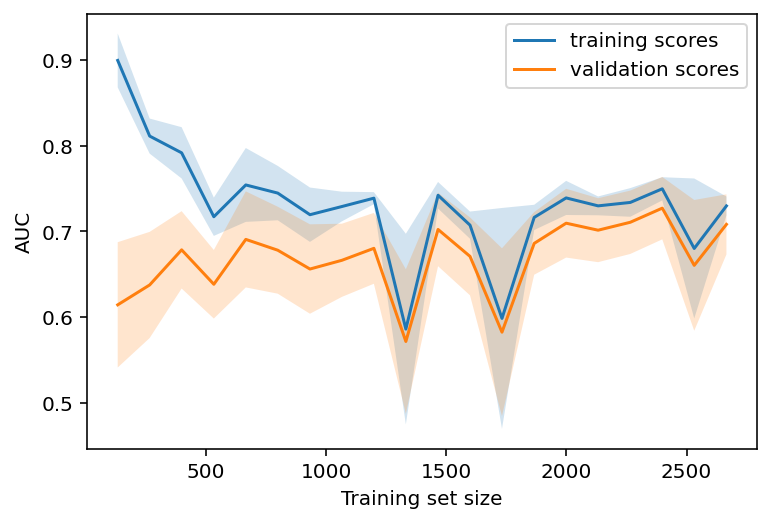

In [63]:
plot_learning_curve(degree=2, alpha=10)

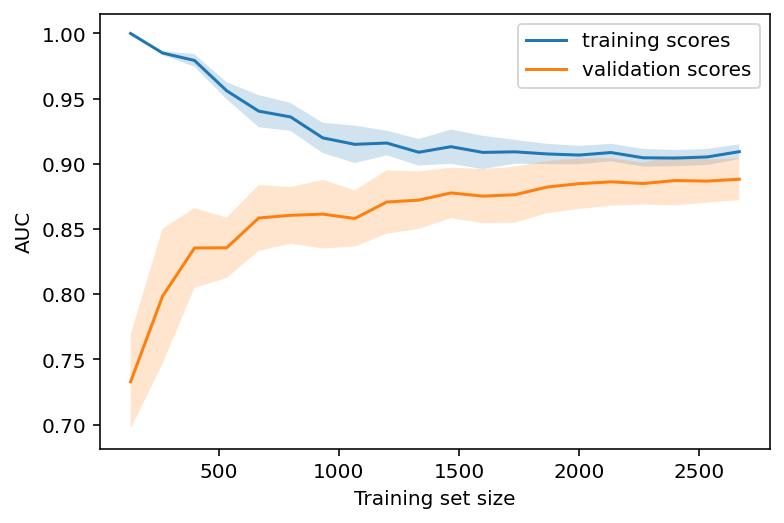

In [64]:
plot_learning_curve(degree=2, alpha=0.05)

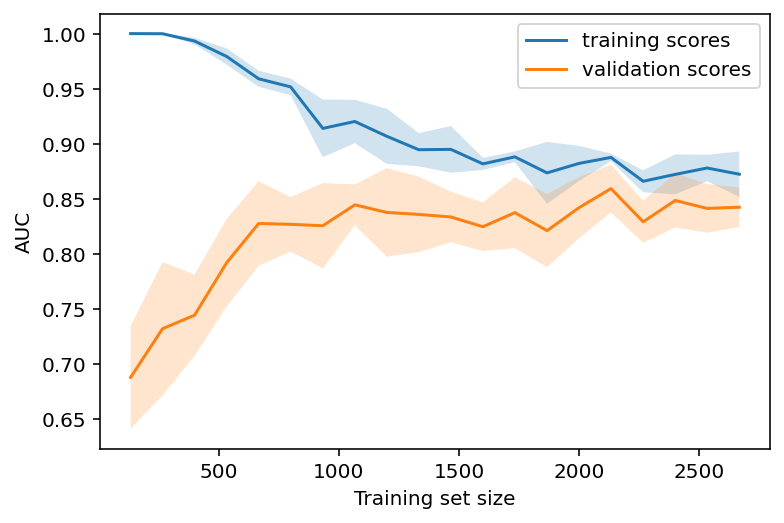

In [65]:
plot_learning_curve(degree=2, alpha=1e-4)